# FinTech in consumer finance - data analysis

In the following notebook we analyze and visualize the data of Levi (2021).


## Load data in dataset

In [1]:
import pandas as pd
# loading data set from previous step
file_path = "mind_the_app_mock_data_noise_1_0.xlsx"
df = pd.read_excel(file_path)
print(df)

      user_id     group   base_income  user_spend_fe  event_month  post  \
0         N_0  Sample N  10484.384884       0.903422           -3     0   
1         N_0  Sample N  10484.384884       0.903422           -2     0   
2         N_0  Sample N  10484.384884       0.903422           -1     0   
3         N_0  Sample N  10484.384884       0.903422            0     1   
4         N_0  Sample N  10484.384884       0.903422            1     1   
...       ...       ...           ...            ...          ...   ...   
35995    X_99  Sample X  16430.825733       1.131019            8     1   
35996    X_99  Sample X  16430.825733       1.131019            9     1   
35997    X_99  Sample X  16430.825733       1.131019           10     1   
35998    X_99  Sample X  16430.825733       1.131019           11     1   
35999    X_99  Sample X  16430.825733       1.131019           12     1   

       logins_total  discretionary_spending  log_discretionary_spending  
0                 5      

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for academic reporting
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

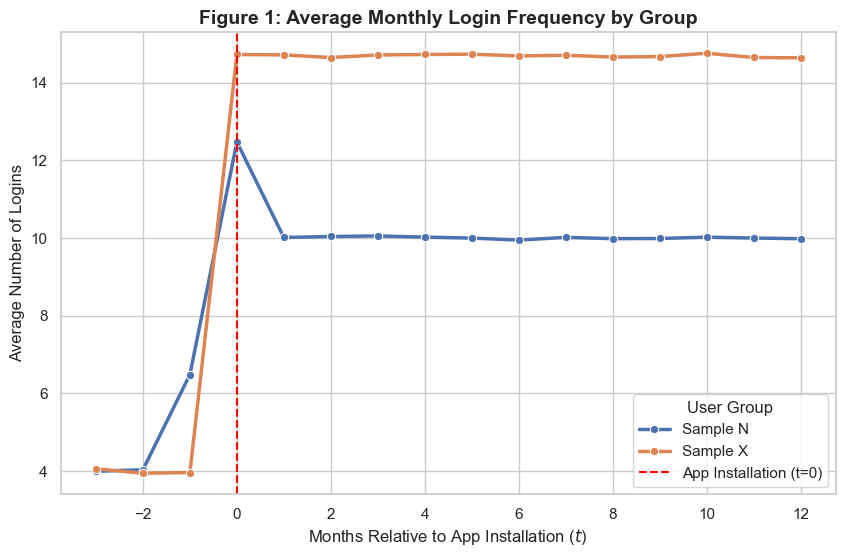

In [3]:
# 1. Visualization: Login Frequency Trend
login_trend = df.groupby(['group', 'event_month'])['logins_total'].mean().reset_index()

plt.figure()
sns.lineplot(data=login_trend, x='event_month', y='logins_total', hue='group', marker='o', linewidth=2.5)
plt.axvline(x=0, color='red', linestyle='--', label='App Installation (t=0)')
plt.title('Figure 1: Average Monthly Login Frequency by Group', fontsize=14, fontweight='bold')
plt.xlabel('Months Relative to App Installation ($t$)', fontsize=12)
plt.ylabel('Average Number of Logins', fontsize=12)
plt.legend(title='User Group')
plt.show()

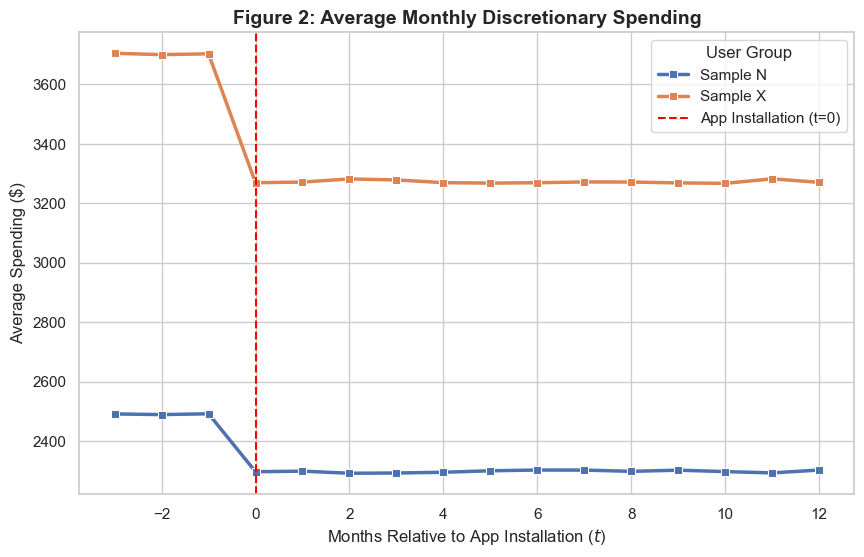

In [4]:
# 2. Visualization: Discretionary Spending Trend
spend_trend = df.groupby(['group', 'event_month'])['discretionary_spending'].mean().reset_index()

plt.figure()
sns.lineplot(data=spend_trend, x='event_month', y='discretionary_spending', hue='group', marker='s', linewidth=2.5)
plt.axvline(x=0, color='red', linestyle='--', label='App Installation (t=0)')
plt.title('Figure 2: Average Monthly Discretionary Spending', fontsize=14, fontweight='bold')
plt.xlabel('Months Relative to App Installation ($t$)', fontsize=12)
plt.ylabel('Average Spending ($)', fontsize=12)
plt.legend(title='User Group')
plt.show()

In [5]:
# 3. Summary Statistics for your Text Description
summary = df.groupby(['group', 'post'])[['logins_total', 'discretionary_spending']].mean().round(2)
print("Summary Statistics (Pre vs. Post Installation):")
print(summary)

Summary Statistics (Pre vs. Post Installation):
               logins_total  discretionary_spending
group    post                                      
Sample N 0             4.84                 2491.09
         1            10.20                 2298.28
Sample X 0             3.99                 3702.86
         1            14.70                 3272.57
